In [1]:
import pandas as pd
name_to_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
    'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
    'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN',
    'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'New York City': 'NYC',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR',
    'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA',
    'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    # 'Puerto Rico': 'PR'
}
# external_file = "/net/dali/home/mscbio/rul98/covid19_symptom_dataset/Graph-WaveNet/data/ILINet.csv"
external_file = "/net/dali/home/mscbio/rul98/benchmark/rawData/ILINet.csv"
df_ext = pd.read_csv(external_file, skiprows=1)[['REGION', 'YEAR', 'WEEK', '%UNWEIGHTED ILI']]
# df_ext = df_ext[~df_ext['YEAR'].isin([2020, 2021])]
exclude_regions = ['Commonwealth of the Northern Mariana Islands', 'Virgin Islands', 'Puerto Rico']
df_ext = df_ext[~df_ext['REGION'].isin(exclude_regions)]
df_ext['state'] = df_ext['REGION'].map(name_to_abbrev)
print(df_ext[df_ext['state'].isna()])
df_ext = df_ext[df_ext['state'].notna()]
df_ext = df_ext[df_ext['%UNWEIGHTED ILI'] != 'X']
df_ext['%UNWEIGHTED ILI'] = pd.to_numeric(df_ext['%UNWEIGHTED ILI'])
df_ext['WEEK'] = df_ext['WEEK'].astype(int).astype(str).str.zfill(2)
# the first day of an MMWR week is Sunday
df_ext['time'] = df_ext['YEAR'].astype(str) + df_ext['WEEK'] + '0'
df_ext['time'] = pd.to_datetime(df_ext['time'], format='%Y%U%w', errors='coerce')
df_pivot = pd.pivot_table(df_ext, values='%UNWEIGHTED ILI', index='time', columns='state').sort_index()
df_pivot

Empty DataFrame
Columns: [REGION, YEAR, WEEK, %UNWEIGHTED ILI, state]
Index: []


state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
time,,,,,,,,,,,,,,,,,,,,,
2010-10-03,0.875146,2.13477,0.696056,0.674721,1.95412,0.660684,0.078309,2.80877,0.100125,0.703367,...,1.102750,0.274655,2.06514,0.747696,1.14343,1.476410,0.510041,0.465022,1.597410,0.632911
2010-10-10,1.128270,2.05999,0.674157,0.749939,2.15266,0.628621,0.238095,2.89079,0.368550,0.870614,...,0.793794,0.499492,2.09394,0.410939,1.23653,1.357770,1.040070,0.581832,1.589680,0.440621
2010-10-17,0.586042,1.94224,0.514217,0.953365,2.24173,0.804020,0.374158,2.41042,0.337025,0.861931,...,0.791023,0.499550,2.10072,0.440583,1.22545,1.482210,0.904393,1.188220,1.526720,0.441798
2010-10-24,0.967742,2.27650,0.413650,0.888804,1.91748,0.909658,0.333542,3.11632,0.460494,0.944188,...,0.801311,0.401638,2.20655,0.755957,1.26902,1.443930,0.955110,1.010490,1.811710,0.490305
2010-10-31,0.683851,2.83371,1.090280,1.185730,2.52326,0.971705,0.396743,2.99118,0.222332,1.224840,...,0.779833,0.528096,2.36381,0.651859,1.26547,1.252760,0.786370,1.096490,1.839860,0.566636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-24,1.190480,2.02868,0.893573,1.340340,1.99630,1.261590,0.864985,1.71776,0.272300,2.530770,...,0.495506,1.761150,2.06200,0.829377,1.43395,0.682335,0.628275,0.756130,0.636527,1.492540
2025-08-31,1.299680,2.14433,1.434020,1.366170,2.21477,1.619140,0.925347,2.28206,0.357922,3.090500,...,0.593437,1.905020,3.26820,0.645161,1.83589,0.684045,0.677406,0.740233,1.281930,1.225200
2025-09-07,1.735520,2.03276,1.691920,1.484490,2.36250,1.789910,1.247180,2.04348,0.327593,2.932030,...,0.667694,1.486770,2.64030,0.939981,1.96047,0.900073,0.691680,1.010620,1.331530,1.362600


In [2]:
df_pivot[:481].to_csv('processed/ILI2019.csv')

<Axes: xlabel='time'>

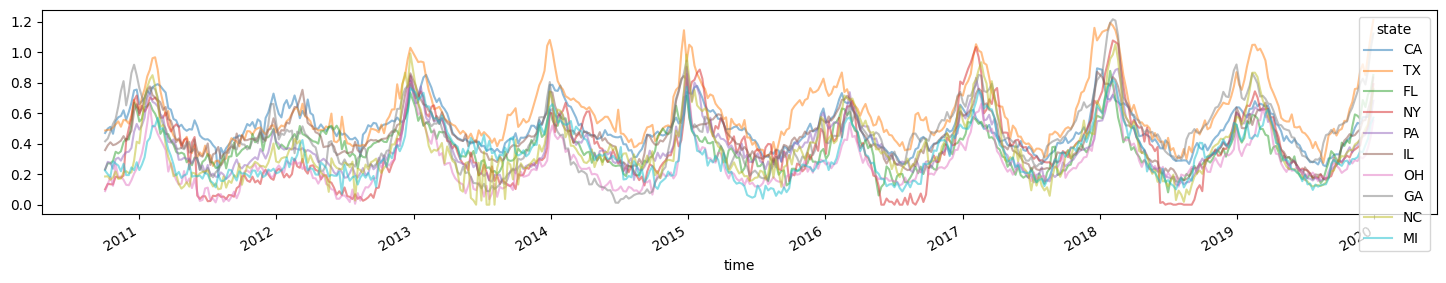

In [3]:
import numpy as np
np.log10(df_pivot[:481][['CA', 'TX', 'FL', 'NY', 'PA', 'IL', 'OH', 'GA', 'NC', 'MI']] + 1).plot(figsize = (18, 3), alpha = 0.5)

In [4]:
import pandas as pd

# Ordered list of areas to include (states + NYC)
states = ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
          'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
          'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'NYC',
          'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT',
          'WA', 'WI', 'WV', 'WY']

# Raw adjacency list in "state,neighbor1,neighbor2,..." format
raw = """AK
AL,MS,TN,GA,FL
AR,MO,TN,MS,LA,TX,OK
AZ,CA,NV,UT,CO,NM
CA,OR,NV,AZ
CO,WY,NE,KS,OK,NM,AZ,UT
CT,NY,NYC,MA,RI
DC,MD,VA
DE,MD,PA,NJ
FL,AL,GA
GA,FL,AL,TN,NC,SC
HI
IA,MN,WI,IL,MO,NE,SD
ID,MT,WY,UT,NV,OR,WA
IL,IN,KY,MO,IA,WI
IN,MI,OH,KY,IL
KS,NE,MO,OK,CO
KY,IN,OH,WV,VA,TN,MO,IL
LA,TX,AR,MS
MA,RI,CT,NY,NH,VT
MD,VA,WV,PA,DC,DE
ME,NH
MI,WI,IN,OH
MN,WI,IA,SD,ND
MO,IA,IL,KY,TN,AR,OK,KS,NE
MS,LA,AR,TN,AL
MT,ND,SD,WY,ID
NC,VA,TN,GA,SC
ND,MN,SD,MT
NE,SD,IA,MO,KS,CO,WY
NH,VT,ME,MA
NJ,DE,PA,NY,NYC
NM,AZ,UT,CO,OK,TX
NV,ID,UT,AZ,CA,OR
NY,NYC,NJ,PA,VT,MA,CT
NYC,NY,NJ,CT
OH,PA,WV,KY,IN,MI
OK,KS,MO,AR,TX,NM,CO
OR,CA,NV,ID,WA
PA,NY,NJ,DE,MD,WV,OH
RI,CT,MA
SC,GA,NC
SD,ND,MN,IA,NE,WY,MT
TN,KY,VA,NC,GA,AL,MS,AR,MO
TX,NM,OK,AR,LA
UT,ID,WY,CO,NM,AZ,NV
VA,NC,TN,KY,WV,MD,DC
VT,NY,NH,MA
WA,ID,OR
WI,MI,MN,IA,IL
WV,OH,PA,MD,VA,KY
WY,MT,SD,NE,CO,UT,ID"""

# Parse the raw adjacency list into a dictionary
adjacency = {}
for line in raw.strip().splitlines():
    parts = line.split(',')
    state = parts[0]
    neighbors = parts[1:]
    adjacency[state] = neighbors

# Build a square adjacency matrix, ensuring symmetry
matrix = {s: {t: 0 for t in states} for s in states}
for s, neighbors in adjacency.items():
    for t in neighbors:
        if s in states and t in states:
            matrix[s][t] = 1
            matrix[t][s] = 1  # ensure symmetry

adj_df = pd.DataFrame(matrix, index=states, columns=states)
adj_df

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
AK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AL,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
AR,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
AZ,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
CA,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CO,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
CT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
DE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FL,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
adj_df.to_csv('processed/ILI2019_adj.csv')

In [6]:
import pandas as pd
HHShosp = pd.read_csv('/net/dali/home/mscbio/rul98/benchmark/rawData/covidcast-hhs-confirmed_admissions_covid_1d-2020-04-01-to-2024-04-26.csv', index_col = 0)
HHShosp['geo_value'] = HHShosp['geo_value'].str.upper()
HHShosp['time_value'] = pd.to_datetime(HHShosp['time_value'], format = '%Y-%m-%d')
HHShosp = HHShosp.pivot(values='value', columns='geo_value', index='time_value')
HHShosp = HHShosp.dropna()
HHShosp[HHShosp < 0] = 0

In [7]:
states = ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
          'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
          'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 
          'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT',
          'WA', 'WI', 'WV', 'WY']
HHShosp = HHShosp[states]
HHShosp

geo_value,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
time_value,,,,,,,,,,,,,,,,,,,,,
2021-08-23,21.0,377.0,190.0,214.0,971.0,132.0,61.0,23.0,26.0,2088.0,...,34.0,362.0,1762.0,82.0,178.0,11.0,180.0,156.0,75.0,46.0
2021-08-24,15.0,379.0,166.0,196.0,948.0,97.0,58.0,17.0,22.0,2066.0,...,33.0,372.0,1724.0,70.0,185.0,5.0,163.0,148.0,64.0,46.0
2021-08-25,33.0,390.0,167.0,204.0,1004.0,127.0,58.0,17.0,24.0,2058.0,...,33.0,385.0,1680.0,78.0,207.0,7.0,158.0,149.0,81.0,43.0
2021-08-26,18.0,397.0,196.0,208.0,951.0,145.0,48.0,17.0,30.0,1948.0,...,30.0,373.0,1807.0,69.0,211.0,8.0,159.0,157.0,108.0,38.0
2021-08-27,21.0,334.0,167.0,229.0,954.0,114.0,53.0,21.0,35.0,1869.0,...,38.0,401.0,1631.0,68.0,189.0,6.0,176.0,166.0,101.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-22,0.0,20.0,4.0,10.0,97.0,15.0,7.0,1.0,4.0,62.0,...,3.0,21.0,66.0,5.0,28.0,0.0,15.0,14.0,4.0,2.0
2024-04-23,0.0,14.0,14.0,16.0,97.0,15.0,6.0,2.0,3.0,56.0,...,3.0,22.0,66.0,3.0,26.0,1.0,12.0,18.0,6.0,1.0
2024-04-24,1.0,12.0,4.0,14.0,92.0,12.0,6.0,0.0,4.0,78.0,...,4.0,12.0,71.0,11.0,26.0,0.0,14.0,15.0,7.0,0.0


<Axes: xlabel='time_value'>

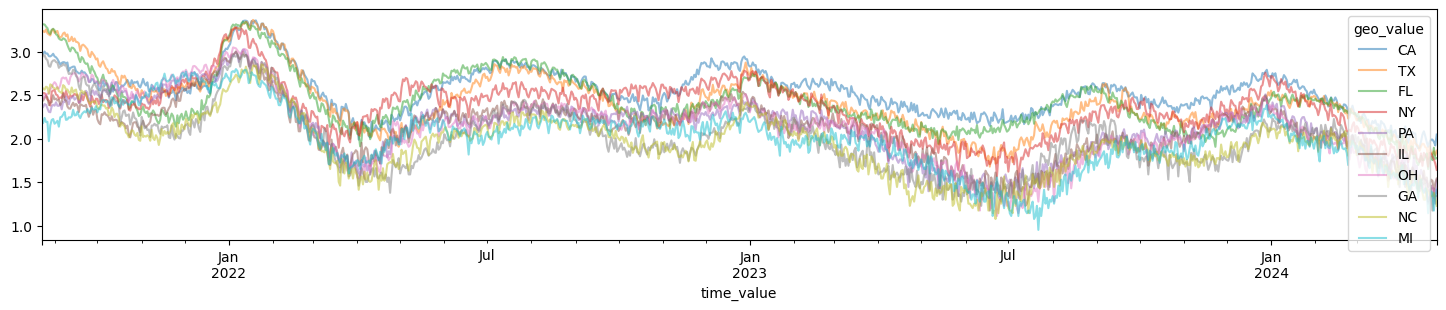

In [8]:
import numpy as np
np.log10(HHShosp[['CA', 'TX', 'FL', 'NY', 'PA', 'IL', 'OH', 'GA', 'NC', 'MI']] + 1).plot(figsize = (18, 3), alpha = 0.5)

In [9]:
import pandas as pd

# Raw adjacency list in "state,neighbor1,neighbor2,..." format
raw = """AK
AL,MS,TN,GA,FL
AR,MO,TN,MS,LA,TX,OK
AZ,CA,NV,UT,CO,NM
CA,OR,NV,AZ
CO,WY,NE,KS,OK,NM,AZ,UT
CT,NY,MA,RI
DC,MD,VA
DE,MD,PA,NJ
FL,AL,GA
GA,FL,AL,TN,NC,SC
HI
IA,MN,WI,IL,MO,NE,SD
ID,MT,WY,UT,NV,OR,WA
IL,IN,KY,MO,IA,WI
IN,MI,OH,KY,IL
KS,NE,MO,OK,CO
KY,IN,OH,WV,VA,TN,MO,IL
LA,TX,AR,MS
MA,RI,CT,NY,NH,VT
MD,VA,WV,PA,DC,DE
ME,NH
MI,WI,IN,OH
MN,WI,IA,SD,ND
MO,IA,IL,KY,TN,AR,OK,KS,NE
MS,LA,AR,TN,AL
MT,ND,SD,WY,ID
NC,VA,TN,GA,SC
ND,MN,SD,MT
NE,SD,IA,MO,KS,CO,WY
NH,VT,ME,MA
NJ,DE,PA,NY
NM,AZ,UT,CO,OK,TX
NV,ID,UT,AZ,CA,OR
NY,NJ,PA,VT,MA,CT
OH,PA,WV,KY,IN,MI
OK,KS,MO,AR,TX,NM,CO
OR,CA,NV,ID,WA
PA,NY,NJ,DE,MD,WV,OH
RI,CT,MA
SC,GA,NC
SD,ND,MN,IA,NE,WY,MT
TN,KY,VA,NC,GA,AL,MS,AR,MO
TX,NM,OK,AR,LA
UT,ID,WY,CO,NM,AZ,NV
VA,NC,TN,KY,WV,MD,DC
VT,NY,NH,MA
WA,ID,OR
WI,MI,MN,IA,IL
WV,OH,PA,MD,VA,KY
WY,MT,SD,NE,CO,UT,ID"""

# Parse the raw adjacency list into a dictionary
adjacency = {}
for line in raw.strip().splitlines():
    parts = line.split(',')
    state = parts[0]
    neighbors = parts[1:]
    adjacency[state] = neighbors

# Build a square adjacency matrix, ensuring symmetry
matrix = {s: {t: 0 for t in states} for s in states}
for s, neighbors in adjacency.items():
    for t in neighbors:
        if s in states and t in states:
            matrix[s][t] = 1
            matrix[t][s] = 1  # ensure symmetry

adj_df = pd.DataFrame(matrix, index=states, columns=states)
adj_df

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
AK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AL,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
AR,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
AZ,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
CA,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CO,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
CT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
DE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FL,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
HHShosp.astype(int).to_csv('processed/HHShosp.csv')
adj_df.to_csv('processed/HHShosp_adj.csv')

<Axes: xlabel='time_value'>

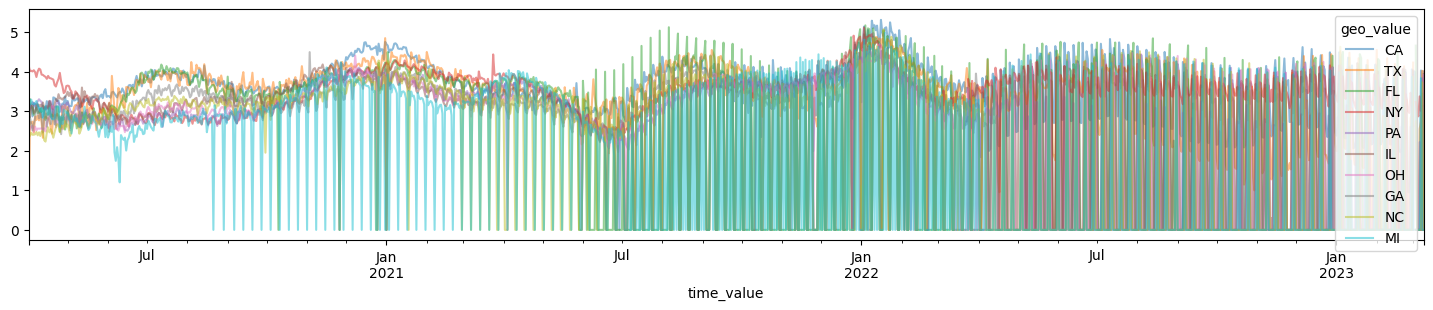

In [11]:
import pandas as pd
JHUcase = pd.read_csv('/net/dali/home/mscbio/rul98/benchmark/rawData/covidcast-jhu-csse-confirmed_incidence_num-2020-04-01-to-2023-03-09.csv', index_col = 0)
JHUcase['geo_value'] = JHUcase['geo_value'].str.upper()
JHUcase['time_value'] = pd.to_datetime(JHUcase['time_value'], format = '%Y-%m-%d')
JHUcase = JHUcase.pivot(values='value', columns='geo_value', index='time_value')
JHUcase[JHUcase < 0] = 0
states = ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI',
          'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN',
          'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 
          'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT',
          'WA', 'WI', 'WV', 'WY']
JHUcase = JHUcase[states]
import numpy as np
np.log10(JHUcase[['CA', 'TX', 'FL', 'NY', 'PA', 'IL', 'OH', 'GA', 'NC', 'MI']] + 1).plot(figsize = (18, 3), alpha = 0.5)

<Axes: xlabel='time_value'>

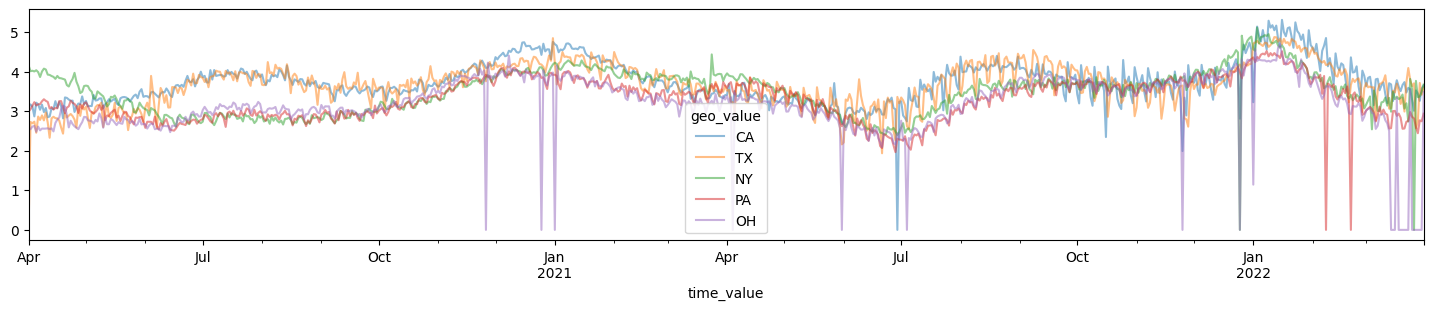

In [12]:
import numpy as np
np.log10(JHUcase[:730][['CA', 'TX', 'NY', 'PA', 'OH']] + 1).plot(figsize = (18, 3), alpha = 0.5)

In [13]:
JHUcase[:730]

geo_value,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
time_value,,,,,,,,,,,,,,,,,,,,,
2020-04-01,13.0,112.0,61.0,124.0,1254.0,4655.0,429.0,91.0,49.0,215.0,...,21.0,234.0,0.0,0.0,234.0,28.0,176.0,144.0,29.0,21.0
2020-04-02,8.0,196.0,59.0,183.0,1499.0,361.0,267.0,67.0,25.0,2052.0,...,36.0,270.0,537.0,198.0,223.0,17.0,781.0,192.0,25.0,20.0
2020-04-03,11.0,235.0,61.0,173.0,1324.0,440.0,1090.0,104.0,57.0,1260.0,...,22.0,252.0,500.0,162.0,306.0,51.0,457.0,264.0,21.0,12.0
2020-04-04,11.0,121.0,39.0,250.0,746.0,320.0,362.0,145.0,143.0,1269.0,...,25.0,201.0,547.0,180.0,395.0,72.0,401.0,18.0,45.0,25.0
2020-04-05,15.0,178.0,94.0,250.0,1655.0,295.0,399.0,100.0,80.0,813.0,...,28.0,312.0,287.0,173.0,233.0,51.0,578.0,290.0,42.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-27,0.0,0.0,38.0,0.0,3384.0,236.0,0.0,0.0,189.0,0.0,...,0.0,78.0,375.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-03-28,551.0,2024.0,21.0,0.0,2811.0,405.0,1014.0,184.0,31.0,0.0,...,0.0,313.0,549.0,255.0,1340.0,308.0,2024.0,891.0,229.0,0.0
2022-03-29,0.0,284.0,144.0,0.0,1846.0,407.0,365.0,92.0,48.0,0.0,...,0.0,260.0,5228.0,98.0,867.0,89.0,0.0,451.0,94.0,56.0


In [14]:
import pandas as pd

# Raw adjacency list in "state,neighbor1,neighbor2,..." format
raw = """AK
AL,MS,TN,GA,FL
AR,MO,TN,MS,LA,TX,OK
AZ,CA,NV,UT,CO,NM
CA,OR,NV,AZ
CO,WY,NE,KS,OK,NM,AZ,UT
CT,NY,MA,RI
DC,MD,VA
DE,MD,PA,NJ
FL,AL,GA
GA,FL,AL,TN,NC,SC
HI
IA,MN,WI,IL,MO,NE,SD
ID,MT,WY,UT,NV,OR,WA
IL,IN,KY,MO,IA,WI
IN,MI,OH,KY,IL
KS,NE,MO,OK,CO
KY,IN,OH,WV,VA,TN,MO,IL
LA,TX,AR,MS
MA,RI,CT,NY,NH,VT
MD,VA,WV,PA,DC,DE
ME,NH
MI,WI,IN,OH
MN,WI,IA,SD,ND
MO,IA,IL,KY,TN,AR,OK,KS,NE
MS,LA,AR,TN,AL
MT,ND,SD,WY,ID
NC,VA,TN,GA,SC
ND,MN,SD,MT
NE,SD,IA,MO,KS,CO,WY
NH,VT,ME,MA
NJ,DE,PA,NY
NM,AZ,UT,CO,OK,TX
NV,ID,UT,AZ,CA,OR
NY,NJ,PA,VT,MA,CT
OH,PA,WV,KY,IN,MI
OK,KS,MO,AR,TX,NM,CO
OR,CA,NV,ID,WA
PA,NY,NJ,DE,MD,WV,OH
RI,CT,MA
SC,GA,NC
SD,ND,MN,IA,NE,WY,MT
TN,KY,VA,NC,GA,AL,MS,AR,MO
TX,NM,OK,AR,LA
UT,ID,WY,CO,NM,AZ,NV
VA,NC,TN,KY,WV,MD,DC
VT,NY,NH,MA
WA,ID,OR
WI,MI,MN,IA,IL
WV,OH,PA,MD,VA,KY
WY,MT,SD,NE,CO,UT,ID"""

# Parse the raw adjacency list into a dictionary
adjacency = {}
for line in raw.strip().splitlines():
    parts = line.split(',')
    state = parts[0]
    neighbors = parts[1:]
    adjacency[state] = neighbors

# Build a square adjacency matrix, ensuring symmetry
matrix = {s: {t: 0 for t in states} for s in states}
for s, neighbors in adjacency.items():
    for t in neighbors:
        if s in states and t in states:
            matrix[s][t] = 1
            matrix[t][s] = 1  # ensure symmetry

adj_df = pd.DataFrame(matrix, index=states, columns=states)
adj_df

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
AK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AL,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
AR,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
AZ,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
CA,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CO,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
CT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
DE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FL,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
JHUcase[:730].astype(int).to_csv('processed/JHUcase.csv')
adj_df.to_csv('processed/JHUcase_adj.csv')

<Axes: xlabel='time_value'>

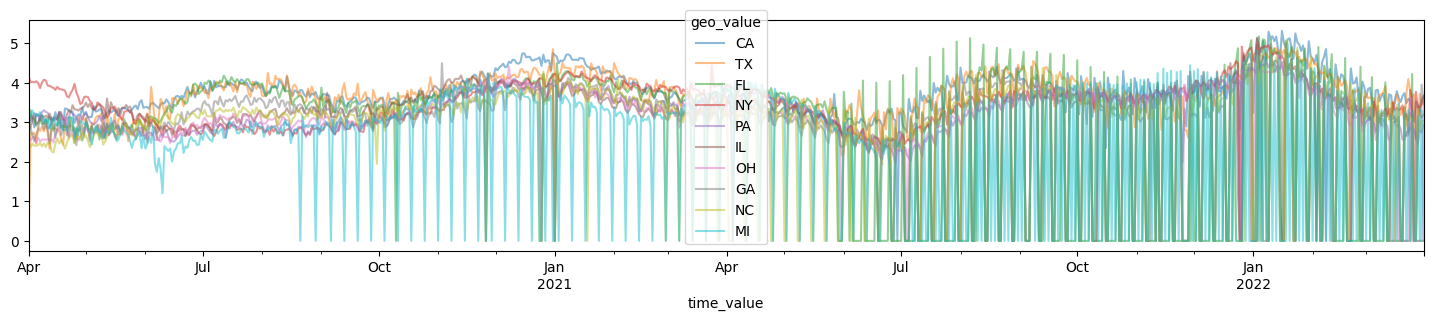

In [16]:
np.log10(JHUcase[:730][['CA', 'TX', 'FL', 'NY', 'PA', 'IL', 'OH', 'GA', 'NC', 'MI']] + 1).plot(figsize = (18, 3), alpha = 0.5)

In [17]:
# /net/dali/home/mscbio/rul98/MultiTrendDetection/GeoPred/EpiLearn/spatial_temporal_Australia.ipynb
# /net/dali/home/mscbio/rul98/MultiTrendDetection/GeoPred/EpiLearn/spatial_temporal_Canada.ipynb

/tmp/ipykernel_296211/2150389911.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_t.index = pd.to_datetime(df_t.index)


Province/State,Alberta,British Columbia,Manitoba,New Brunswick,Newfoundland and Labrador,Northwest Territories,Nova Scotia,Nunavut,Ontario,Prince Edward Island,Quebec,Saskatchewan,Yukon
2020-04-01,64.0,0.0,24.0,11.0,23.0,1.0,26.0,0.0,457.0,0.0,697.0,9.0,0.0
2020-04-02,215.0,108.0,40.0,10.0,8.0,0.0,20.0,0.0,428.0,1.0,875.0,13.0,1.0
2020-04-03,0.0,53.0,15.0,0.0,0.0,2.0,14.0,0.0,464.0,0.0,770.0,14.0,0.0
2020-04-04,106.0,29.0,0.0,0.0,12.0,0.0,29.0,0.0,343.0,0.0,806.0,11.0,0.0
2020-04-05,106.0,0.0,21.0,7.0,22.0,0.0,26.0,0.0,355.0,0.0,634.0,18.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.0,0.0,2144.0,639.0,357.0,0.0,581.0,0.0,10300.0,0.0,8231.0,136.0,0.0
2021-12-28,0.0,0.0,822.0,306.0,194.0,0.0,561.0,14.0,12898.0,272.0,12833.0,185.0,0.0
2021-12-29,10918.0,11013.0,946.0,486.0,312.0,0.0,586.0,37.0,17160.0,129.0,13149.0,297.0,27.0
2021-12-30,4000.0,4383.0,1121.0,572.0,349.0,97.0,511.0,18.0,17090.0,0.0,14188.0,591.0,34.0


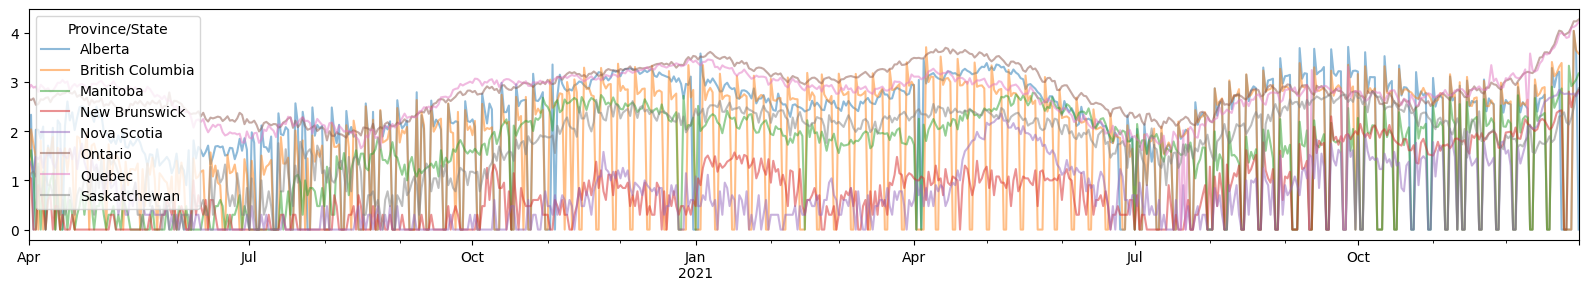

In [18]:
import pandas as pd
import numpy as np
df = pd.read_csv('/net/dali/home/mscbio/rul98/benchmark/rawData/Canada_covid19_confirmed.csv')
date_cols = df.columns[4:]
df_cases = df[["Province/State"] + list(date_cols)]
df_t = df_cases.set_index("Province/State").T
df_t.index = pd.to_datetime(df_t.index)
df_daily = df_t.diff().iloc[1:]
df_daily[df_daily < 0] = 0
df_daily = df_daily[['Alberta', 'British Columbia', 'Manitoba', 
                      'New Brunswick', 'Newfoundland and Labrador',
                      'Northwest Territories', 'Nova Scotia', 'Nunavut', 
                      'Ontario','Prince Edward Island', 'Quebec', 
                      'Saskatchewan', 'Yukon']]
np.log10(df_daily.iloc[69:709][['Alberta', 'British Columbia', 'Manitoba', 
                      'New Brunswick', 'Nova Scotia', 
                      'Ontario', 'Quebec', 
                      'Saskatchewan']]+1).plot(figsize=(20, 3), alpha = 0.5)
df_daily.iloc[69:709]

In [19]:
provinces = df_daily.columns.to_list()
adjacency = {
    'Alberta': ['British Columbia', 'Saskatchewan', 'Northwest Territories'],
    'British Columbia': ['Alberta', 'Yukon'],
    'Manitoba': ['Saskatchewan', 'Ontario', 'Nunavut'],
    'New Brunswick': ['Quebec', 'Nova Scotia', 'Prince Edward Island'],
    'Newfoundland and Labrador': ['Quebec'],
    'Northwest Territories': ['Yukon', 'British Columbia', 'Alberta', 'Saskatchewan', 'Nunavut'],
    'Nova Scotia': ['New Brunswick'],
    'Nunavut': ['Manitoba', 'Northwest Territories', 'Quebec'],
    'Ontario': ['Manitoba', 'Quebec'],
    'Prince Edward Island': ['New Brunswick'],
    'Quebec': ['Ontario', 'Newfoundland and Labrador', 'New Brunswick', 'Nunavut'],
    'Saskatchewan': ['Alberta', 'Manitoba', 'Northwest Territories'],
    'Yukon': ['British Columbia', 'Northwest Territories']
}
adj_matrix = np.zeros((len(provinces), len(provinces)), dtype=int)

# Fill matrix using the mappings
for region, neighbors in adjacency.items():
    if region not in provinces:
        continue
    i = provinces.index(region)
    for neighbor in neighbors:
        if neighbor not in provinces:
            continue
        j = provinces.index(neighbor)
        adj_matrix[i, j] = 1
        adj_matrix[j, i] = 1  # symmetric

# Create DataFrame for better readability
adj_df = pd.DataFrame(adj_matrix, index=provinces, columns=provinces)

adj_df

,Alberta,British Columbia,Manitoba,New Brunswick,Newfoundland and Labrador,Northwest Territories,Nova Scotia,Nunavut,Ontario,Prince Edward Island,Quebec,Saskatchewan,Yukon
Alberta,0,1,0,0,0,1,0,0,0,0,0,1,0
British Columbia,1,0,0,0,0,1,0,0,0,0,0,0,1
Manitoba,0,0,0,0,0,0,0,1,1,0,0,1,0
New Brunswick,0,0,0,0,0,0,1,0,0,1,1,0,0
Newfoundland and Labrador,0,0,0,0,0,0,0,0,0,0,1,0,0
Northwest Territories,1,1,0,0,0,0,0,1,0,0,0,1,1
Nova Scotia,0,0,0,1,0,0,0,0,0,0,0,0,0
Nunavut,0,0,1,0,0,1,0,0,0,0,1,0,0
Ontario,0,0,1,0,0,0,0,0,0,0,1,0,0
Prince Edward Island,0,0,0,1,0,0,0,0,0,0,0,0,0


In [20]:
df_daily.iloc[69:709].astype(int).to_csv('processed/CAcase.csv')
adj_df.to_csv('processed/CAcase_adj.csv')

/tmp/ipykernel_296211/3559701450.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_t.index = pd.to_datetime(df_t.index)


Province/State,Australian Capital Territory,New South Wales,Northern Territory,Queensland,South Australia,Tasmania,Victoria,Western Australia
2020-04-01,4.0,150.0,2.0,38.0,30.0,0.0,51.0,28.0
2020-04-02,3.0,116.0,2.0,54.0,0.0,3.0,68.0,8.0
2020-04-03,4.0,91.0,1.0,38.0,29.0,2.0,49.0,0.0
2020-04-04,2.0,104.0,4.0,27.0,11.0,6.0,30.0,36.0
2020-04-05,3.0,87.0,1.0,7.0,0.0,2.0,20.0,17.0
...,...,...,...,...,...,...,...,...
2021-12-27,244.0,6031.0,4.0,1928.0,838.0,49.0,2698.0,5.0
2021-12-28,125.0,11149.0,26.0,1573.0,998.0,57.0,3750.0,0.0
2021-12-29,248.0,12182.0,22.0,2218.0,1465.0,97.0,5137.0,0.0
2021-12-30,5.0,21131.0,76.0,3111.0,3453.0,148.0,5882.0,5.0


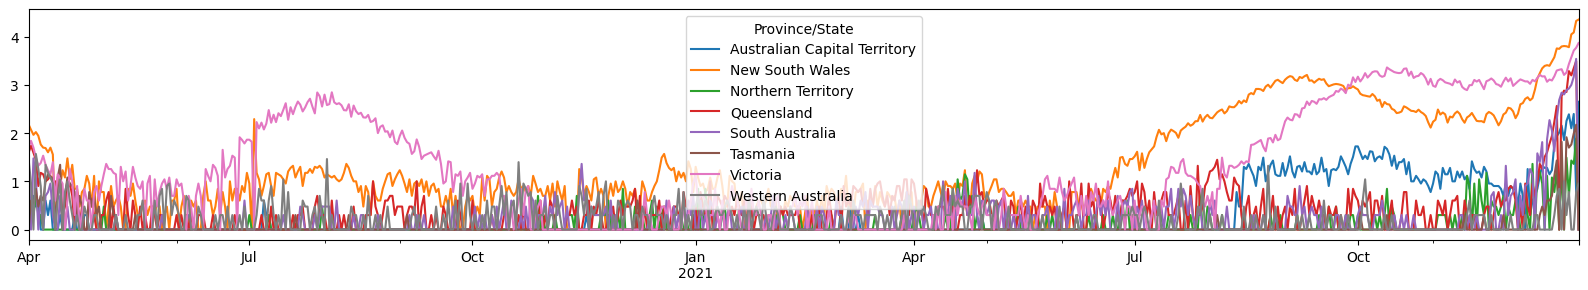

In [21]:
import pandas as pd
import numpy as np
df = pd.read_csv('/net/dali/home/mscbio/rul98/benchmark/rawData/Australia_covid19_confirmed.csv')
date_cols = df.columns[4:]
df_cases = df[["Province/State"] + list(date_cols)]
df_t = df_cases.set_index("Province/State").T
df_t.index = pd.to_datetime(df_t.index)
df_daily = df_t.diff().iloc[1:]
df_daily[df_daily < 0] = 0
np.log10(df_daily.iloc[69:709]+1).plot(figsize=(20, 3))
df_daily.iloc[69:709]

In [22]:
provinces = df_daily.columns.to_list()
adjacency = {
    'Australian Capital Territory': ['New South Wales'],
    'New South Wales': ['Queensland', 'South Australia', 'Victoria', 'Australian Capital Territory'],
    'Northern Territory': ['Queensland', 'South Australia', 'Western Australia'],
    'Queensland': ['New South Wales', 'Northern Territory', 'South Australia'],
    'South Australia': ['Western Australia', 'Northern Territory', 'Queensland', 'New South Wales', 'Victoria'],
    'Tasmania': [],  # Island, no land borders
    'Victoria': ['New South Wales', 'South Australia'],
    'Western Australia': ['Northern Territory', 'South Australia']
}
adj_matrix = np.zeros((len(provinces), len(provinces)), dtype=int)

# Fill matrix using the mappings
for region, neighbors in adjacency.items():
    if region not in provinces:
        continue
    i = provinces.index(region)
    for neighbor in neighbors:
        if neighbor not in provinces:
            continue
        j = provinces.index(neighbor)
        adj_matrix[i, j] = 1
        adj_matrix[j, i] = 1  # symmetric

# Create DataFrame for better readability
adj_df = pd.DataFrame(adj_matrix, index=provinces, columns=provinces)

adj_df

,Australian Capital Territory,New South Wales,Northern Territory,Queensland,South Australia,Tasmania,Victoria,Western Australia
Australian Capital Territory,0,1,0,0,0,0,0,0
New South Wales,1,0,0,1,1,0,1,0
Northern Territory,0,0,0,1,1,0,0,1
Queensland,0,1,1,0,1,0,0,0
South Australia,0,1,1,1,0,0,1,1
Tasmania,0,0,0,0,0,0,0,0
Victoria,0,1,0,0,1,0,0,0
Western Australia,0,0,1,0,1,0,0,0


In [23]:
df_daily.iloc[69:709].astype(int).to_csv('processed/AUcase.csv')
adj_df.to_csv('processed/AUcase_adj.csv')